In [66]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import random

**Лабораторная работа 1**

In [113]:
#В лотерее 100 билетов, из которых 5 выигрышные. Как велика вероятность выигрыша для того, кто имеет 15 билетов?
random.seed(a=1345, version=2)

# Число экспериментов
n_exp = 100000

p_0 = 1          #   Вероятность, полученная на предыдущей попытке
delta_ = 1.1     #   

while delta_ >= 0.00001:
    count_ = 0

    for i in range(n_exp):             # Проводим n_exp экспериментов
        t = np.random.uniform(0.0, 1.0, 15)
        
        if any(t<0.05):
            count_ += 1

    p= count_/n_exp              # Оцениваем вероятность
    delta_ = abs(p - p_0)        # Считаем изменение вероятности
    p_0 = p                      # Новая оценка вероятности заменяет старую
    n_exp = round(n_exp * 1.1)   # Увеличиваем число экспериментов

print(n_exp)
print(p)
print('accurate=',1-0.95**15)

452631
0.5363502258902555
accurate= 0.536708769840247


Точность = 0.0001, при n = 452631. Как видим, отличие от истинного решения в четвёртом знаке после запятой.

**Лабораторная работа 2**

Колода игральных карт содержит 52 карты, разделяющиеся на 4 различные масти по 13 карт в каждой. Предположим, что колода тщательно перетасована, так что вытаскивание любой карты одинаково вероятно. Вытащим 6 из них. Найти вероятность того, что среди этих карт королей будет больше чем десяток.

In [132]:
#  Задаем зерно датчика a, 
#  опция version=2 требует преобразовать а в целое число, если требуется
random.seed(a=12345, version=2)

# Число экспериментов
n_exp = 10000

#колода, важно только количество королей и десяток
deck = ["everything_else"] * 44 + ["q"] * 4 + ["10"] * 4   

p_0 = 1          #   Вероятность, полученная на предыдущей попытке
delta_ = 1.1     #

while delta_ >= 0.0001:

#  Обнуляем счетчик
    count_ = 0

    for i in range(n_exp):             # Проводим n_exp экспериментов
        a = random.sample(deck, 6)     # Выбираем 6 карт без возвращения

        if a.count("q")>a.count("10"):
            count_ += 1

    p= count_/n_exp              # Оцениваем вероятность
    delta_ = abs(p - p_0)        # Считаем изменение вероятности
    p_0 = p                      # Новая оценка вероятности заменяет старую
    n_exp = round(n_exp * 1.1)   # Увеличиваем число экспериментов

print(n_exp)
print(p)

497894
0.2727320930294213


Погрешность равна 0.0001.

**Лабораторная работа 3**

В квадрат с вершинами (0, 0), (0, 1), (1,0), (1,1) наудачу брошена точка М. Пусть (x, y) будут ее координаты. Предполагается, что вероятность попадания в область, лежащую целиком внутри квадрата, зависит лишь от площади этой области и пропорциональна ей.
Найти P{min(x,y)<1/4}

In [129]:
# Число экспериментов
n_exp = 1000000

m=0  #  Число точек, попавших в искомую область

#  Задаем зерно датчика a 
#  version=2 требует преобразовать а в целое число, если требуется
random.seed(a=12345, version=2)

for i in range(n_exp):             # Проводим n_exp экспериментов
    a = np.random.uniform(0.0, 1.0, 2)     # Бросаем точку в квадрат [0,1]*[0,1]
    if (any(a<1/4)):
        m+=1
    prob_tmp.append(m/(i+1))

print("Приближенный ответ после ", n_exp, "экспериментов ", m/n_exp)

print("Точный ответ ", 7/16)


Приближенный ответ после  1000000 экспериментов  0.437051
Точный ответ  0.4375


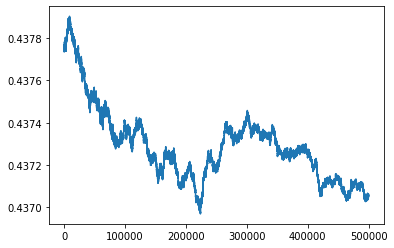

In [130]:
plt.plot(prob_tmp[500000 : 1000000])

Как видим на графике, последние 500000 итераций решение ответ колеблется в пределах 0.437-0.4378, погрешность равна 0.001.